In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# font from https://stackoverflow.com/questions/11367736/matplotlib-consistent-font-using-latex
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino'], 'size' : 10})

# to set all sizes

# axes.titlesize : 24
# axes.labelsize : 20
# lines.linewidth : 3
# lines.markersize : 10
# xtick.labelsize : 16
# ytick.labelsize : 16
    
# dimensions for figures to fit well in content16b.cls
# \the\linewidth
LINEWIDTH = 397/72 # pt to in
# \the\textheight
TEXTHEIGHT =  646/72 # pt to in

In [2]:
N = 2 * 20

In [3]:
n = np.arange(N)

In [4]:
x = np.zeros(N)
x[0:N//2] = 2
x -= 1

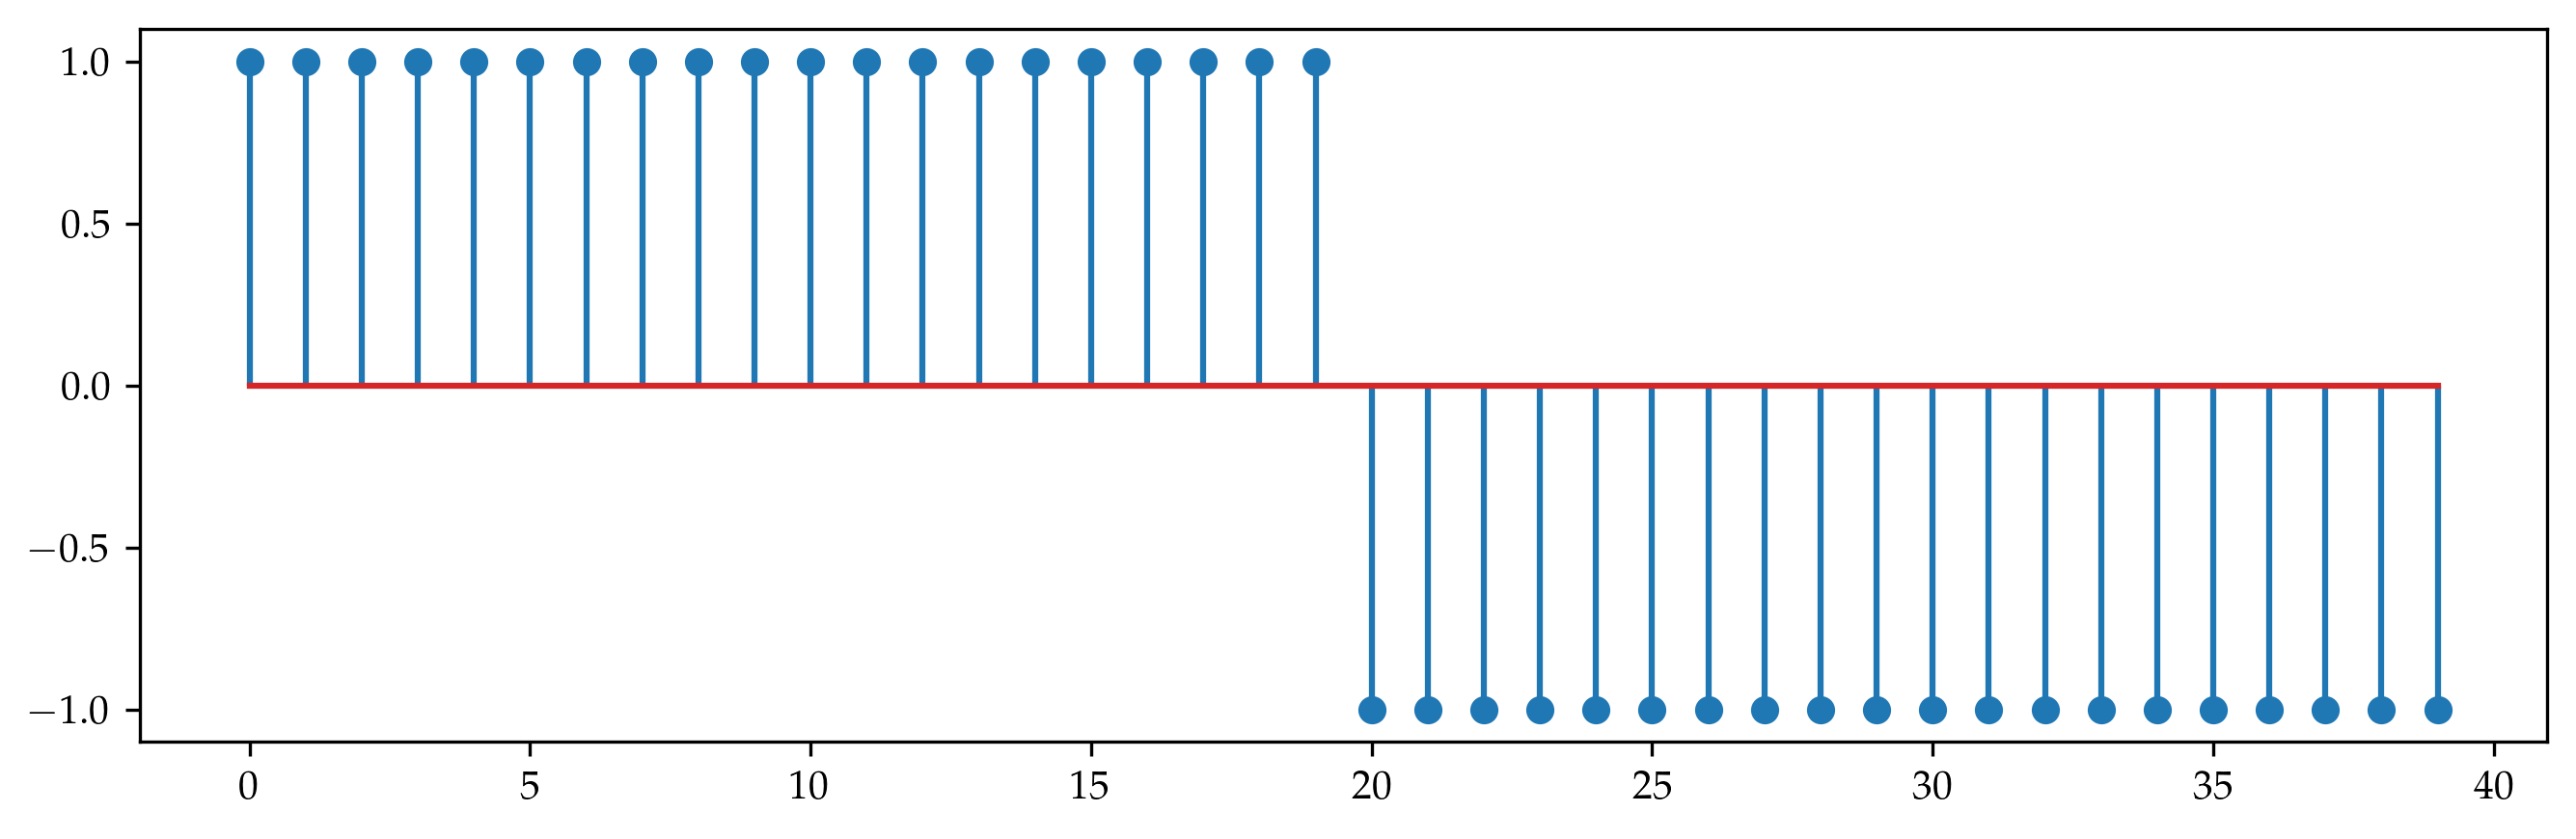

In [5]:
plt.figure(figsize=(9, 3), dpi=300)
plt.stem(x, use_line_collection=True)

plt.tight_layout()
plt.show()

In [6]:
T = 1
tau = 8

S = np.roll(np.eye(N), 1, axis=1)
H = (1 - np.exp(-T/tau)) * np.linalg.inv(S - np.exp(-T/tau) * np.eye(N))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


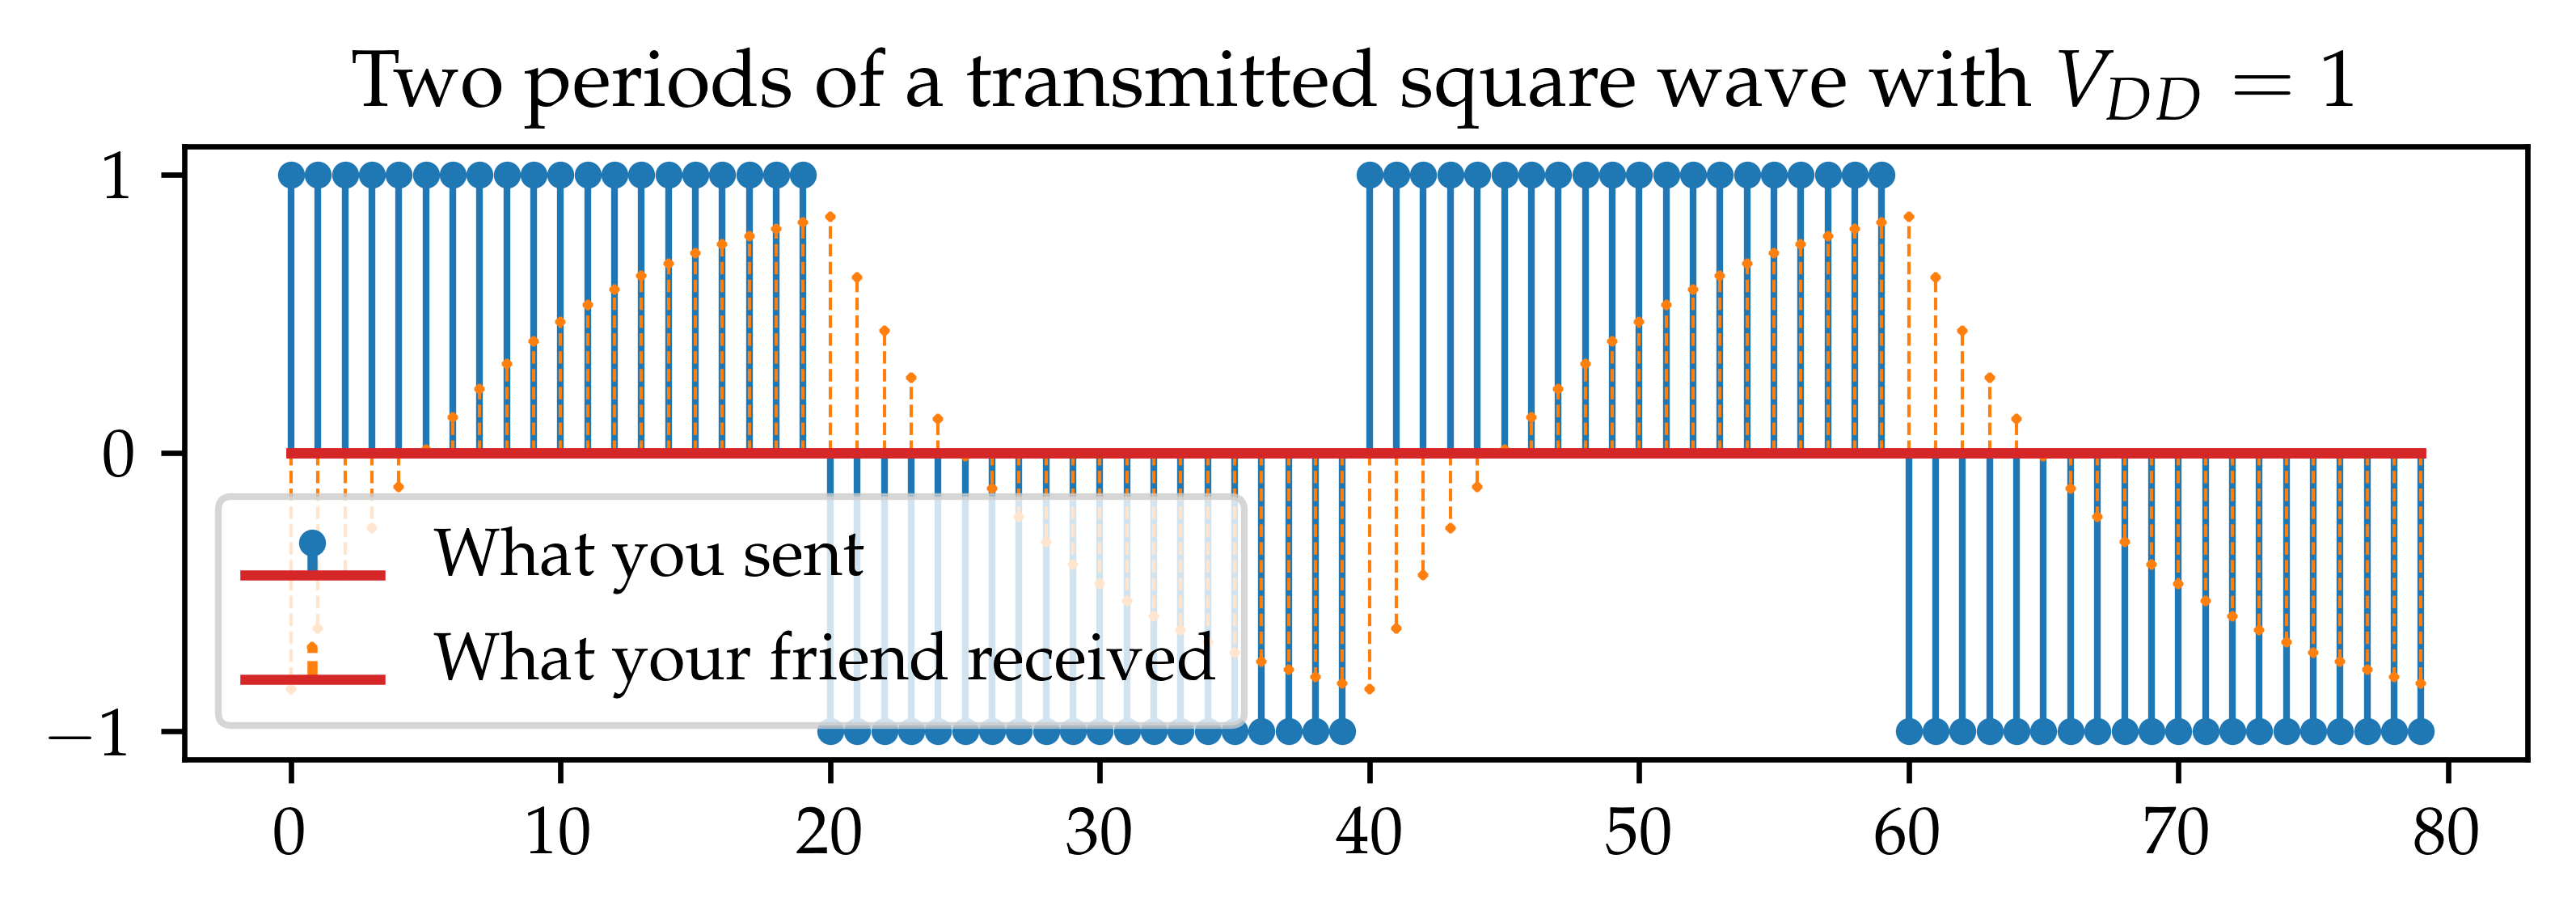

In [7]:
plt.figure(figsize=(LINEWIDTH, 2), dpi=600)

num_periods = 2
markerline, stemlines, baseline = plt.stem(np.tile(x, num_periods), use_line_collection=True)
markerline.set_markersize(3)
stemlines.set_linewidth(1)

markerline, stemlines, baseline = \
    plt.stem(np.tile(H @ x, num_periods), markerfmt='C1x', linefmt='C1--', use_line_collection=True)
markerline.set_markersize(1)
stemlines.set_linewidth(0.5)
# plt.ylim(-1.5,2)

plt.title('Two periods of a transmitted square wave with $V_{DD} = 1$')
plt.legend(['What you sent', 'What your friend received'])

plt.tight_layout()
# plt.savefig('sqwave-lowpassed.pdf')
plt.show()

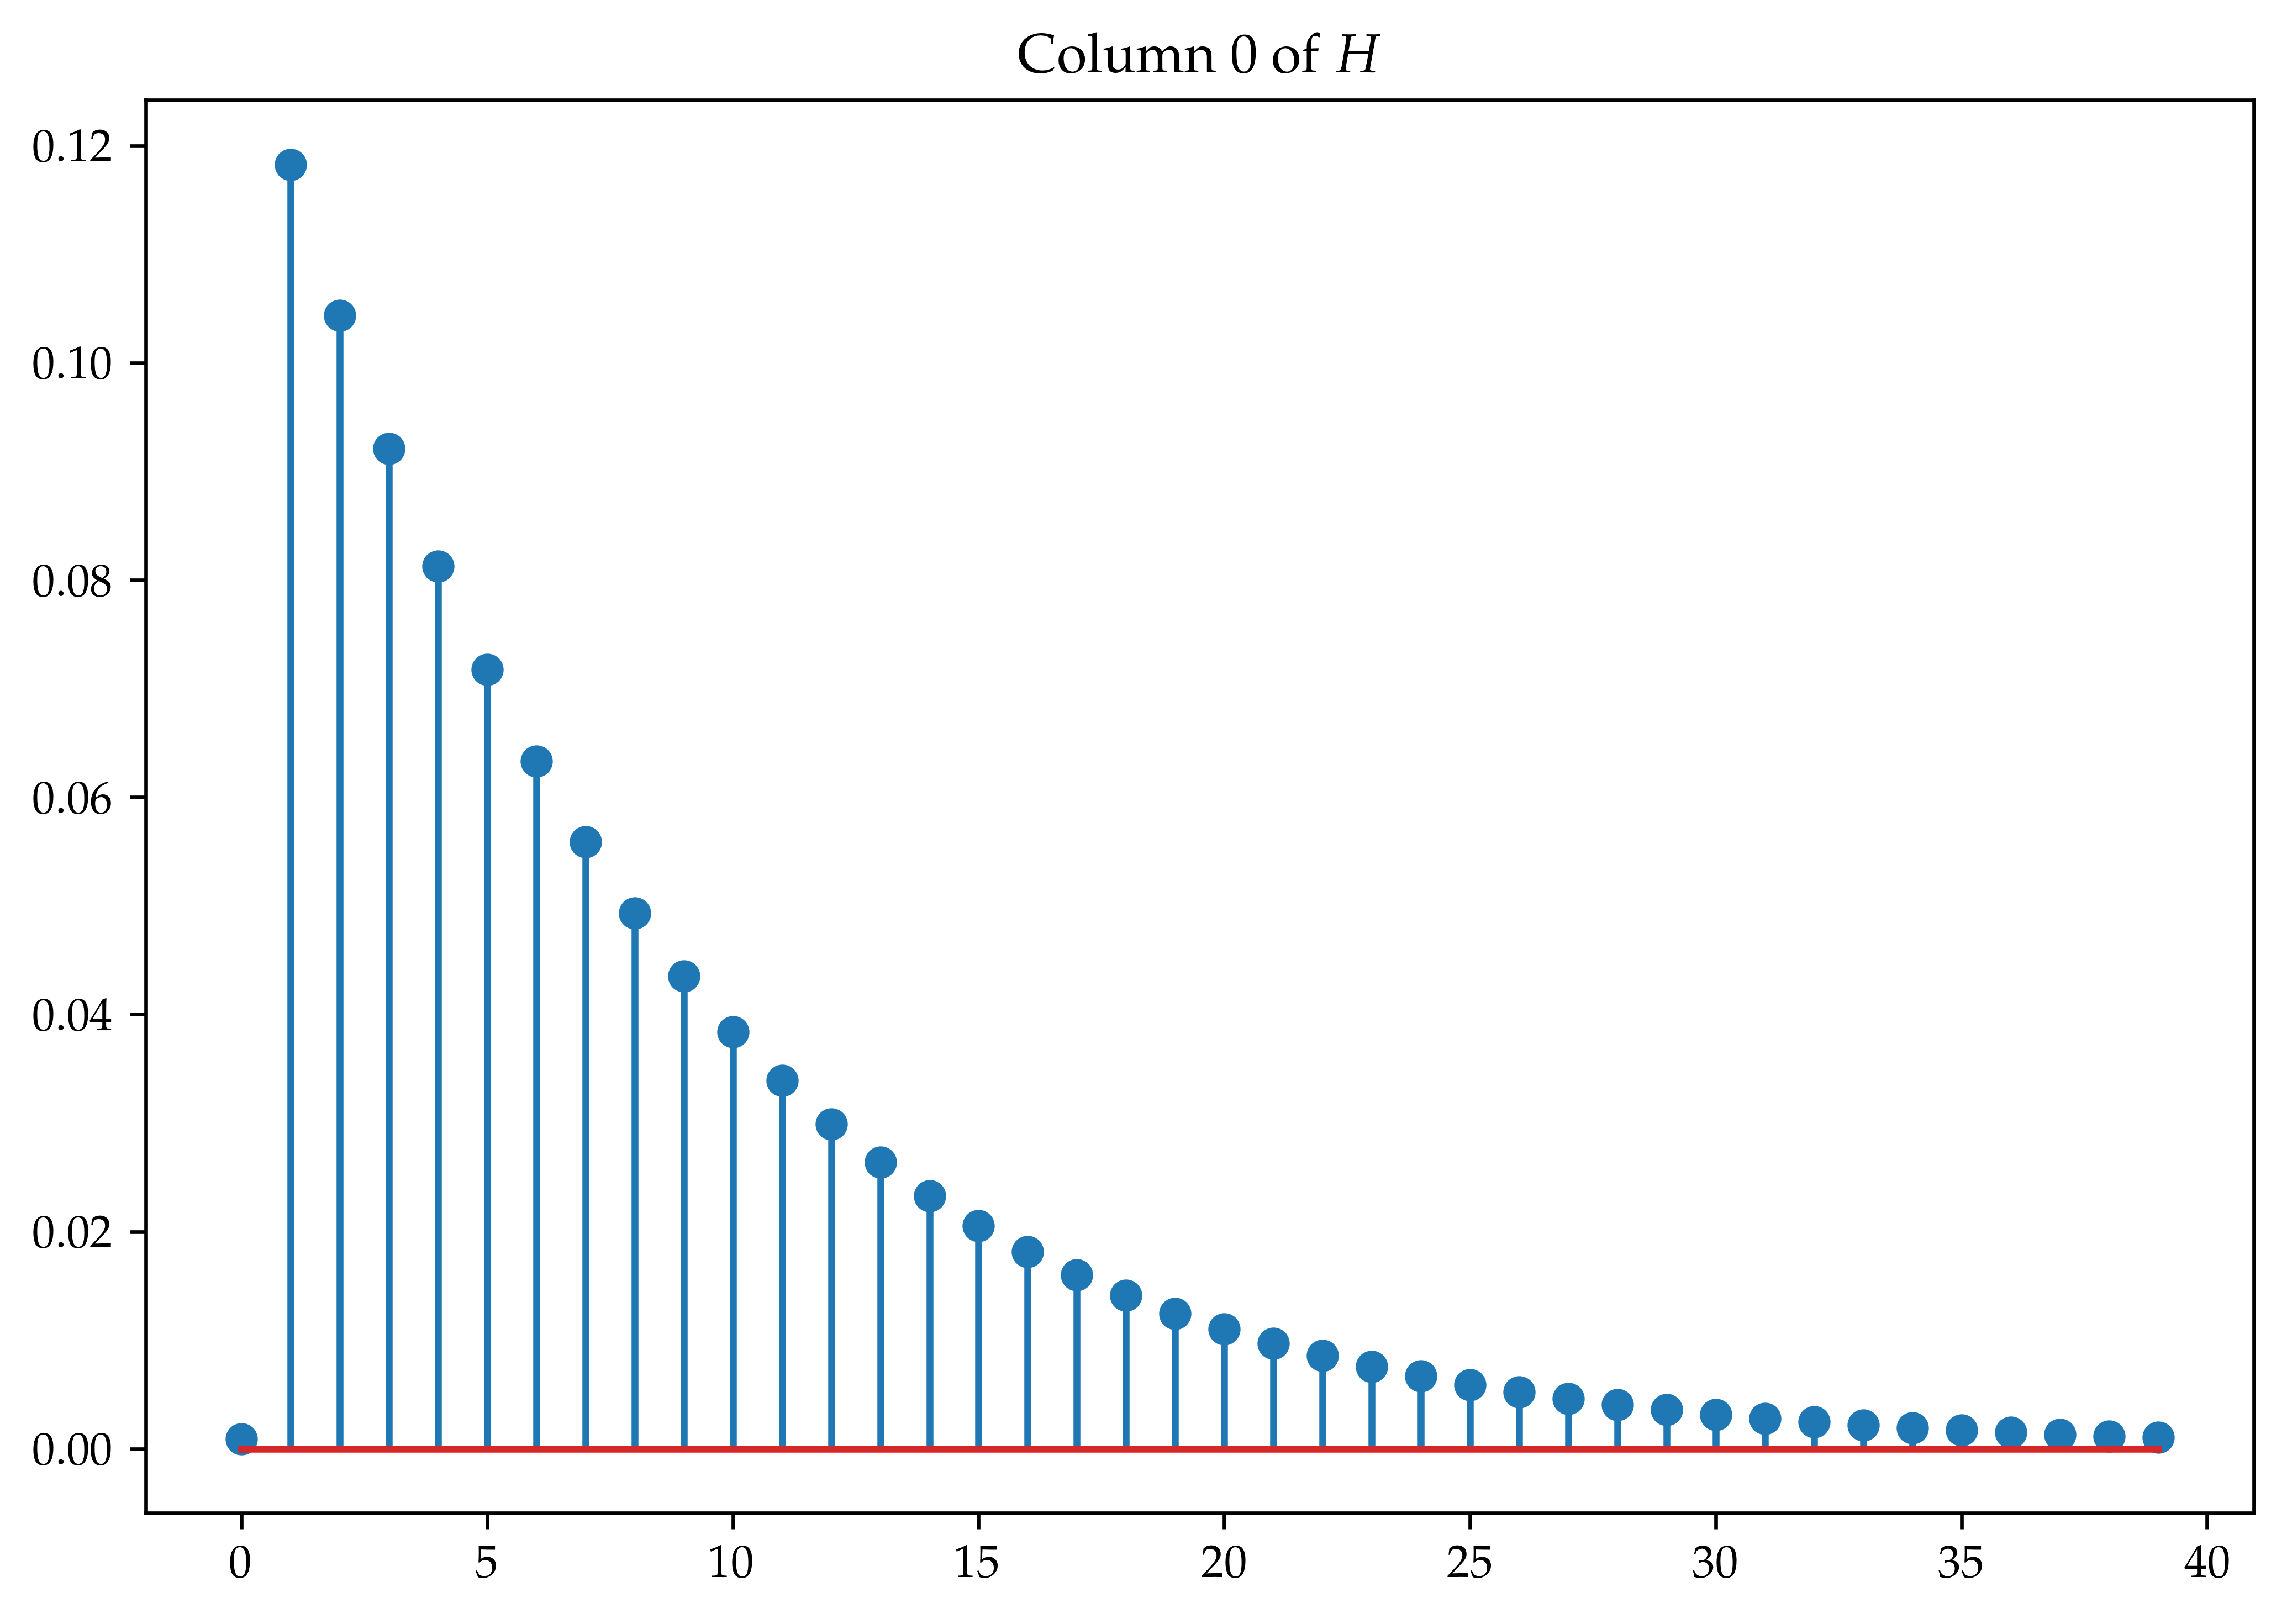

In [8]:
plt.figure(figsize=(7, 5), dpi=600)

plt.stem(H[:, 0], use_line_collection=True)
# plt.stem(np.tile(H @ x, num_periods), markerfmt='C1x', linefmt='C1--', use_line_collection=True)
# plt.ylim(-1.5,2)

plt.title('Column 0 of $H$')
# plt.legend(['What you sent', 'What your friend received'])

plt.tight_layout()
# plt.savefig('H-0.pdf')
plt.show()

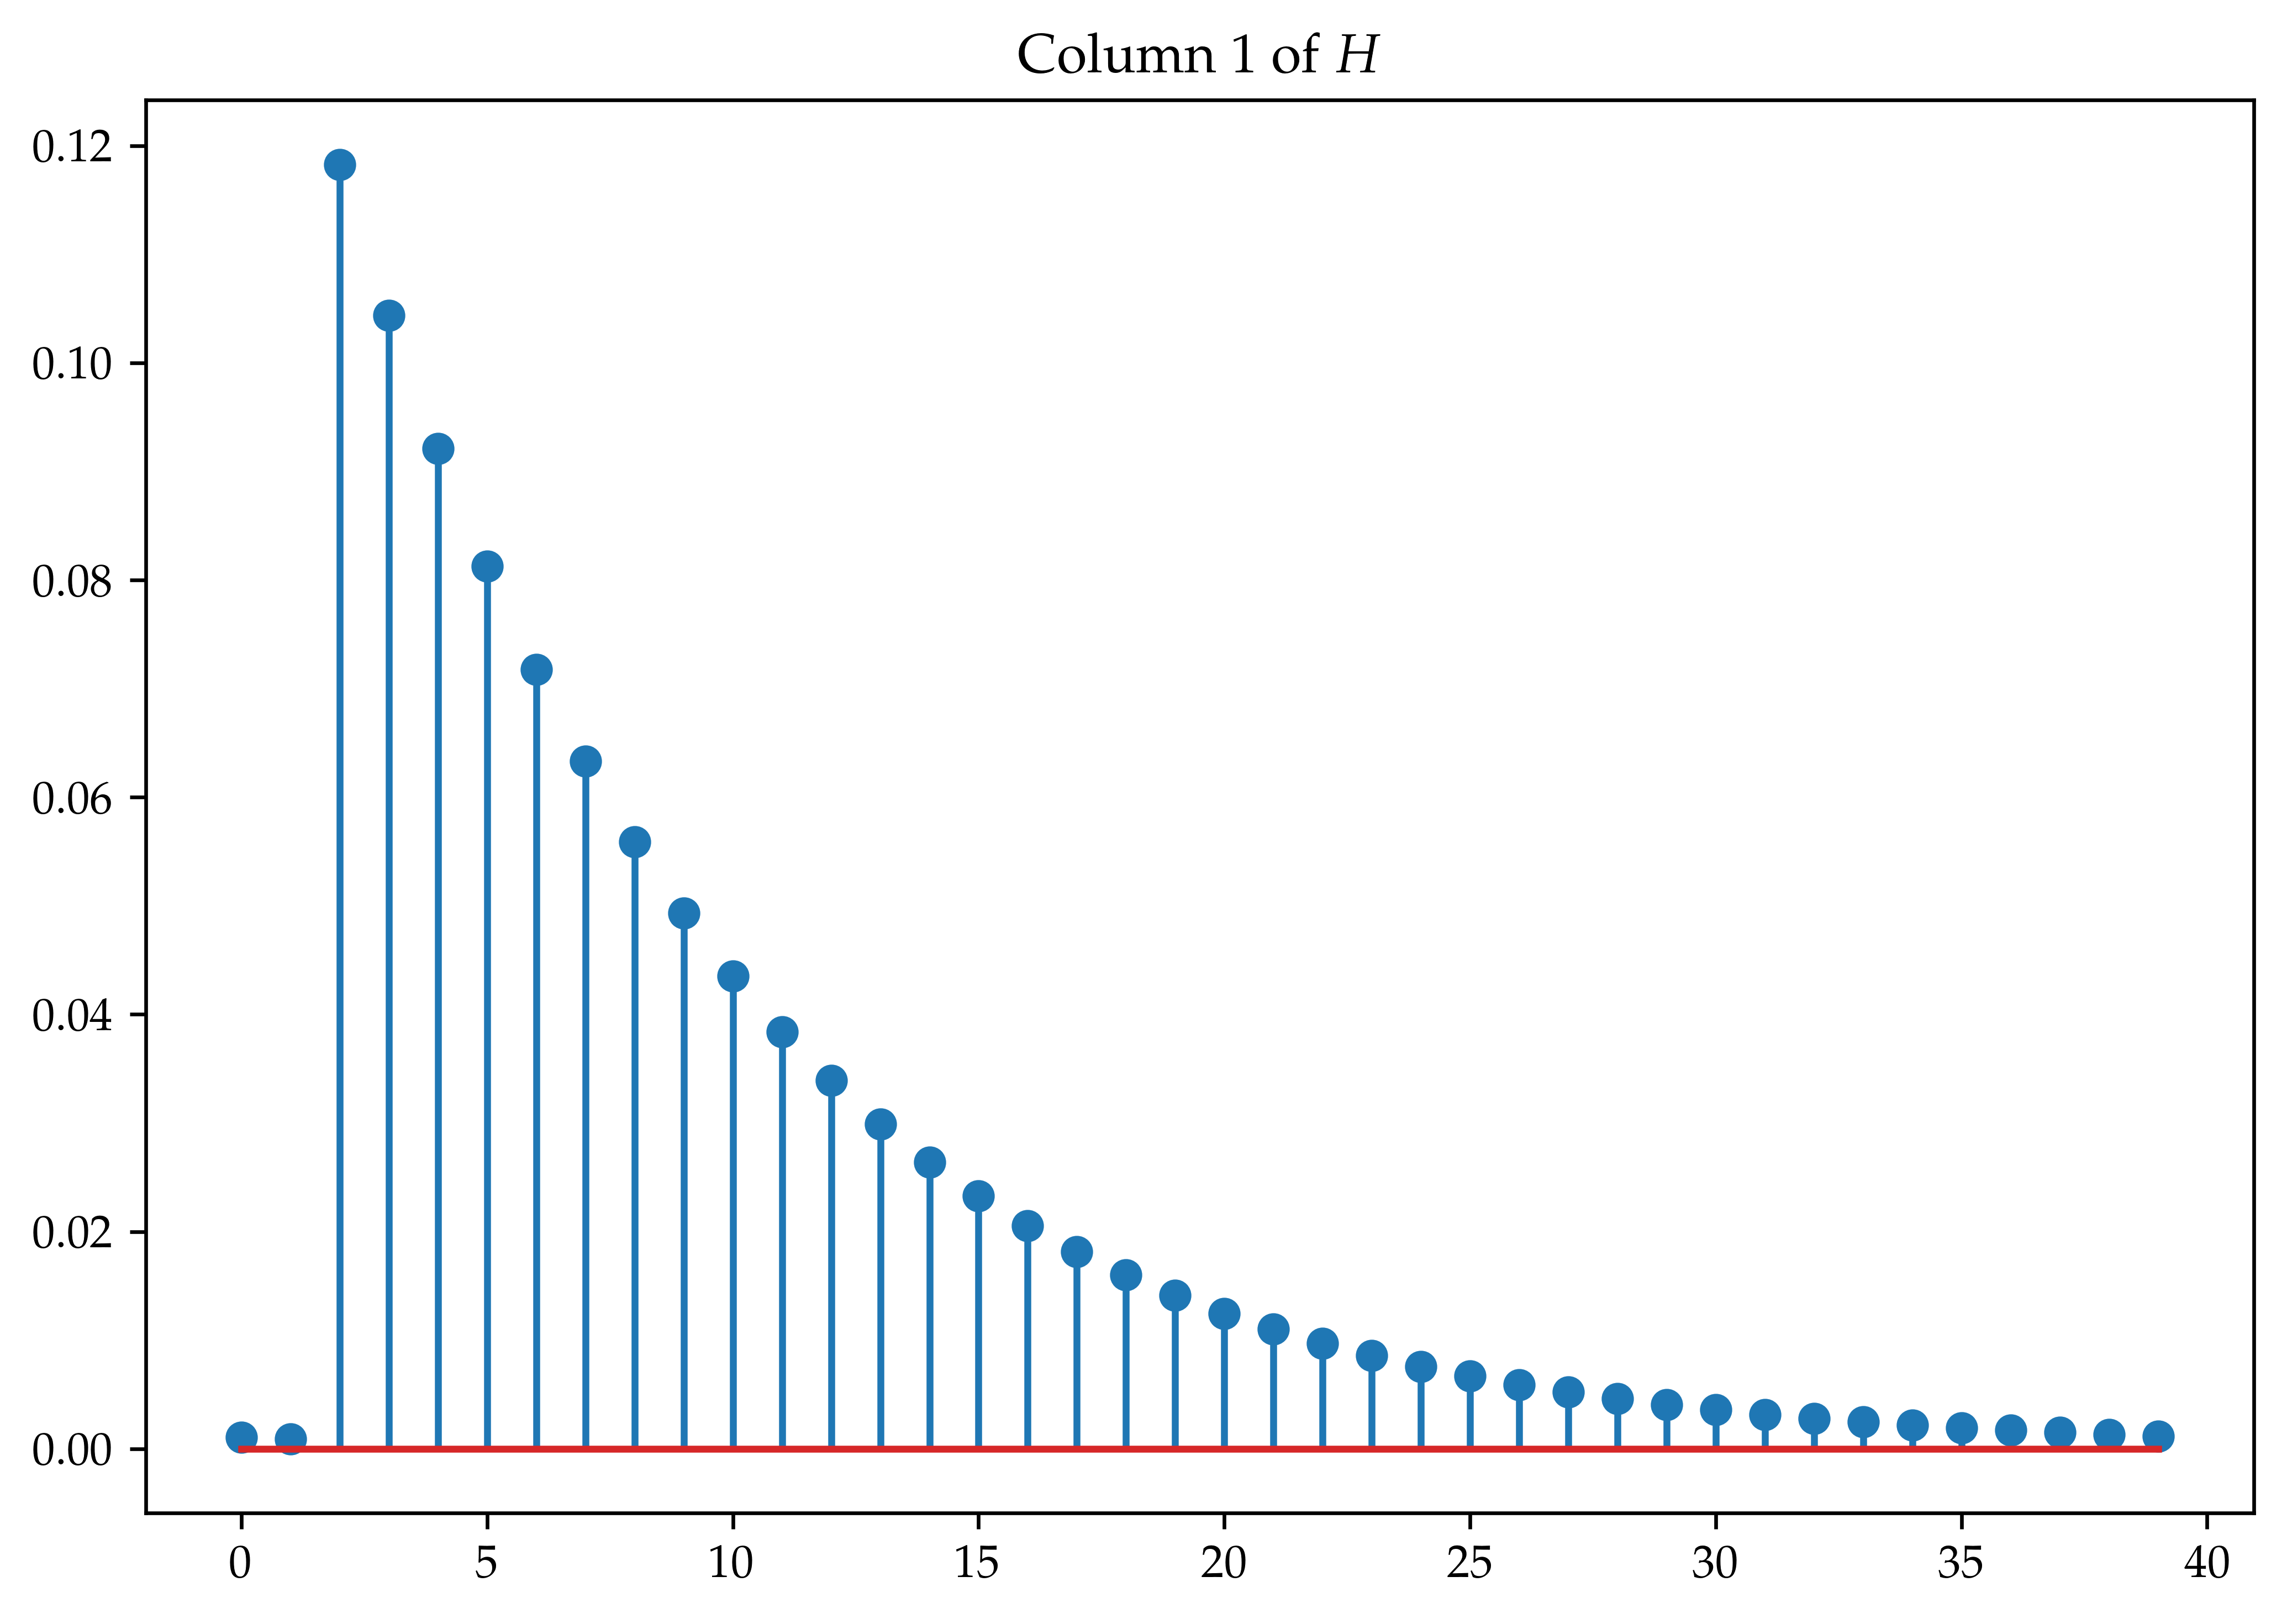

In [9]:
plt.figure(figsize=(7, 5), dpi=600)

plt.stem(H[:, 1], use_line_collection=True)
# plt.stem(np.tile(H @ x, num_periods), markerfmt='C1x', linefmt='C1--', use_line_collection=True)
# plt.ylim(-1.5,2)

plt.title('Column 1 of $H$')
# plt.legend(['What you sent', 'What your friend received'])

plt.tight_layout()
# plt.savefig('H-1.pdf')
plt.show()

## In, transfer, out in time and frequency domain

In [10]:
LINEWIDTH

5.513888888888889

In [11]:
SMALL_SIZE = 6.18
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth=0.5)

X = np.fft.fft(x, norm='ortho')
h = H[:, 0]
g = np.fft.fft(h, norm='ortho')
y = H @ x
Y = np.fft.fft(y, norm='ortho')

plt.figure(figsize=(LINEWIDTH, 5), dpi=600)

markersize = 1
markerlinewidth = 0.618
baselinewidth=0.618
kwargs = {'box_aspect': 0.618}

plt.subplot(3,3,1, **kwargs)
markerline, stemlines, baseline = plt.stem(x, use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("$x$")

plt.subplot(3,3,2, **kwargs)
markerline, stemlines, baseline = plt.stem(np.abs(X), use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("Magnitude of $X$")

plt.subplot(3,3,3, **kwargs)
markerline, stemlines, baseline = plt.stem(np.angle(X), use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("Angle of $X$")

plt.subplot(3,3,4, **kwargs)
markerline, stemlines, baseline = plt.stem(h, use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("$h$")

plt.subplot(3,3,5, **kwargs)
markerline, stemlines, baseline = plt.stem(np.abs(g), use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("Magnitude of $g$")

plt.subplot(3,3,6, **kwargs)
markerline, stemlines, baseline = plt.stem(np.angle(g), use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("Angle of $g$")

plt.subplot(3,3,7, **kwargs)
markerline, stemlines, baseline = plt.stem(y, use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("$y$")

plt.subplot(3,3,8, **kwargs)
markerline, stemlines, baseline = plt.stem(np.abs(Y), use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("Magnitude of $Y$")

plt.subplot(3,3,9, **kwargs)
markerline, stemlines, baseline = plt.stem(np.angle(Y), use_line_collection=True)
markerline.set_markersize(markersize)
stemlines.set_linewidth(markerlinewidth)
baseline.set_linewidth(baselinewidth)
plt.yticks([])
plt.title("Angle of $Y$")

plt.tight_layout()
plt.savefig('inHout.pdf')
plt.close()
# plt.show()


## Equalization

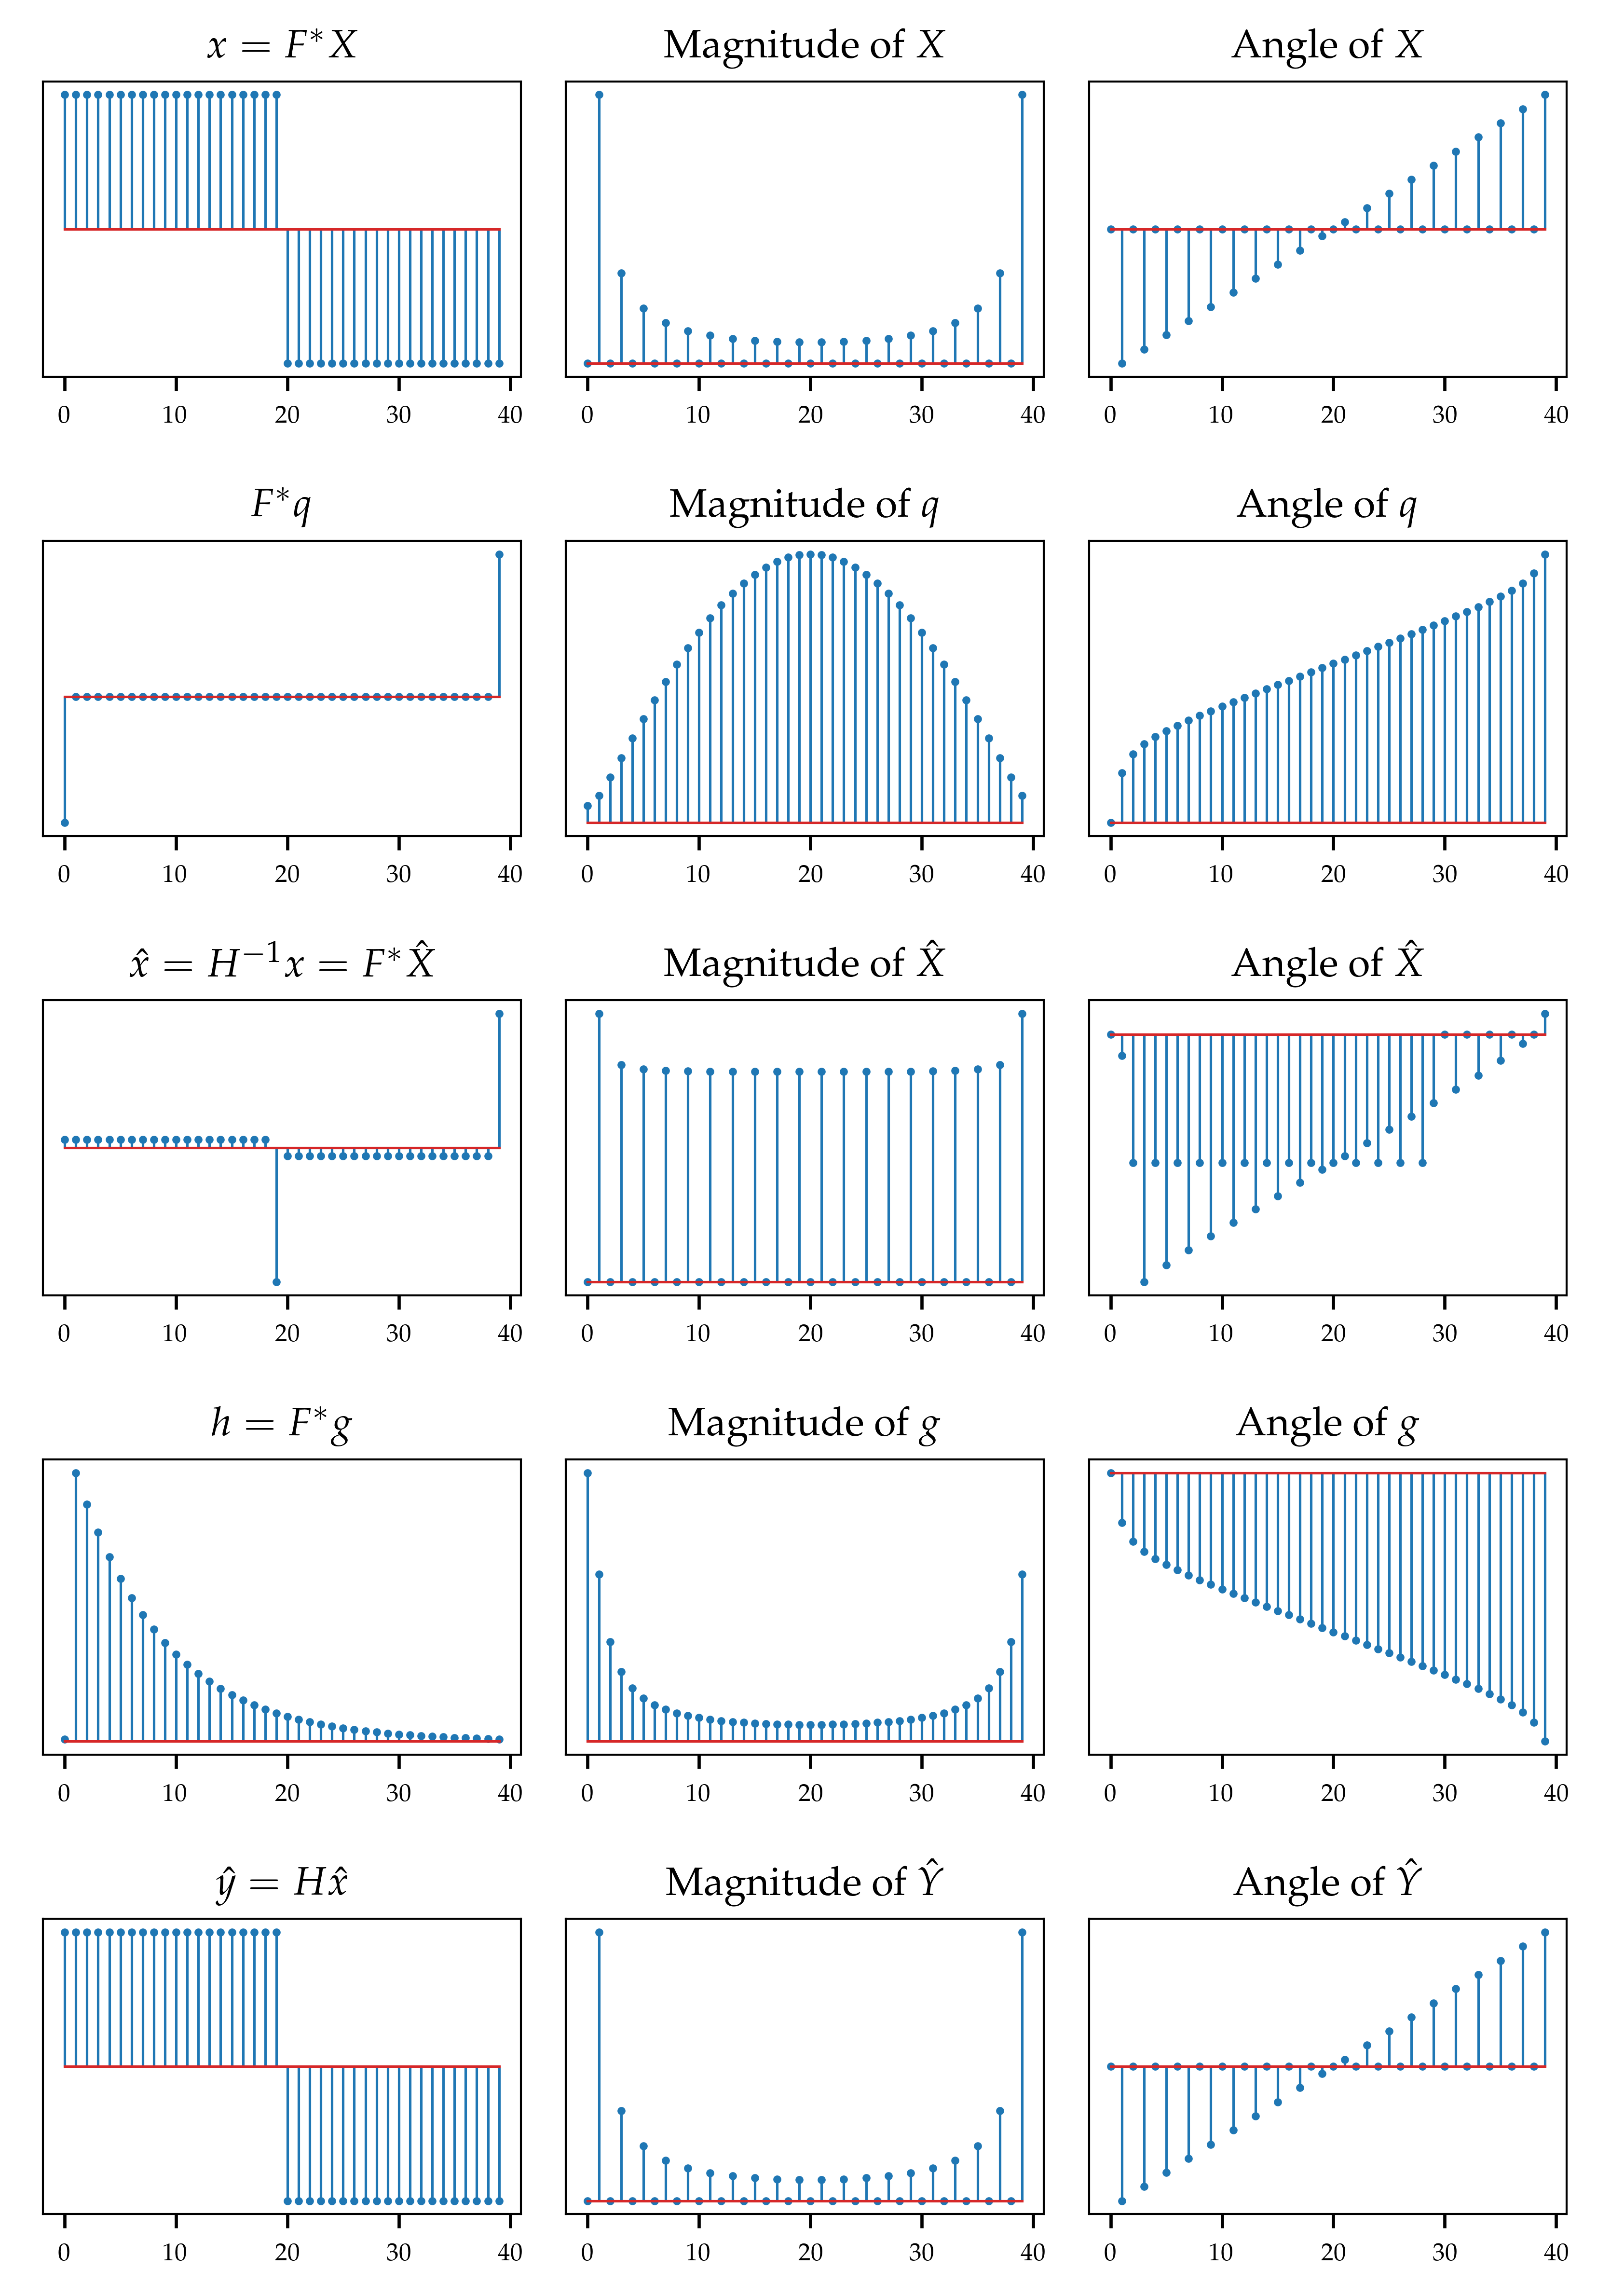

In [17]:
SMALL_SIZE = 6.18
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth=0.5)

X = np.fft.fft(x, norm='ortho')
h = H[:, 0]
g = np.fft.fft(h, norm='ortho')
y = H @ x
Y = np.fft.fft(y, norm='ortho')

plt.figure(figsize=(LINEWIDTH, 8), dpi=600)

markersize = 1
markerlinewidth = 0.618
baselinewidth=0.618
kwargs = {'box_aspect': 0.618}

def stem_help(seq, title):
    markerline, stemlines, baseline = plt.stem(seq, use_line_collection=True)
    markerline.set_markersize(markersize)
    stemlines.set_linewidth(markerlinewidth)
    baseline.set_linewidth(baselinewidth)
    plt.yticks([])
    plt.title(title)
    return

plt.subplot(5,3,1, **kwargs)
stem_help(x, '$x = F^* X$')

plt.subplot(5,3,2, **kwargs)
stem_help(np.abs(X), 'Magnitude of $X$')

plt.subplot(5,3,3, **kwargs)
stem_help(np.unwrap(np.angle(X)), 'Angle of $X$')



irs = np.linalg.inv(H)[:, 0]

plt.subplot(5,3,4, **kwargs)
stem_help(irs, '$F^*q$')

plt.subplot(5,3, 5, **kwargs)
stem_help(np.abs(1/g), 'Magnitude of $q$')

plt.subplot(5,3, 6, **kwargs)
stem_help(np.unwrap(np.angle(1/g)), 'Angle of $q$')




plt.subplot(5,3,7, **kwargs)
stem_help(np.linalg.solve(H, x), '$\hat x = H^{-1}x = F^*\hat X$')

plt.subplot(5,3, 8, **kwargs)
stem_help(np.abs(X/g), 'Magnitude of $\hat X$')

plt.subplot(5,3, 9, **kwargs)
stem_help(np.unwrap(np.angle(X/g)), 'Angle of $\hat X$')




plt.subplot(5,3, 10, **kwargs)
stem_help(H[:, 0], '$h = F^*g$')

plt.subplot(5,3, 11, **kwargs)
stem_help(np.abs(g), 'Magnitude of $g$')

plt.subplot(5,3, 12, **kwargs)
stem_help(np.unwrap(np.angle(g)), 'Angle of $g$')




plt.subplot(5,3, 13, **kwargs)
stem_help(x, '$\hat y = H \hat x$')

plt.subplot(5,3, 14, **kwargs)
stem_help(np.abs(X), 'Magnitude of $\hat Y$')

plt.subplot(5,3, 15, **kwargs)
stem_help(np.unwrap(np.angle(X)), 'Angle of $\hat Y$')

plt.tight_layout()
plt.savefig('eq-unwrapped.jpg')
# plt.close()
plt.show()
